In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [83]:
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = 50

In [3]:
df = pd.read_csv(r"C:\Users\U6056186\Downloads\concrete_data.csv")

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
X= df.drop(columns='Strength')
y= df['Strength']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [13]:
lr =LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred =lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314852

In [17]:
lr2 = LinearRegression()
(cross_val_score(lr2,X,y,scoring='r2')).mean()

0.46099404916628667

<Figure size 1400x400 with 0 Axes>

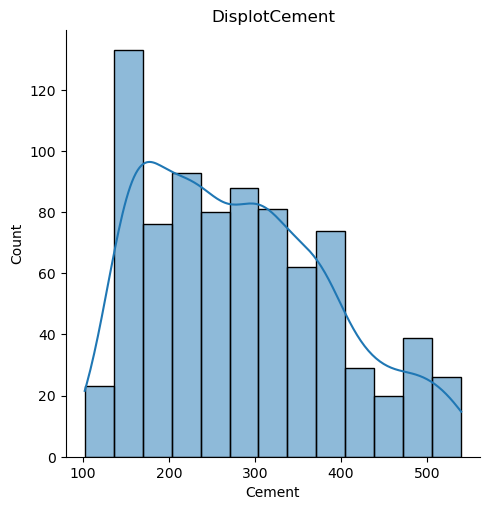

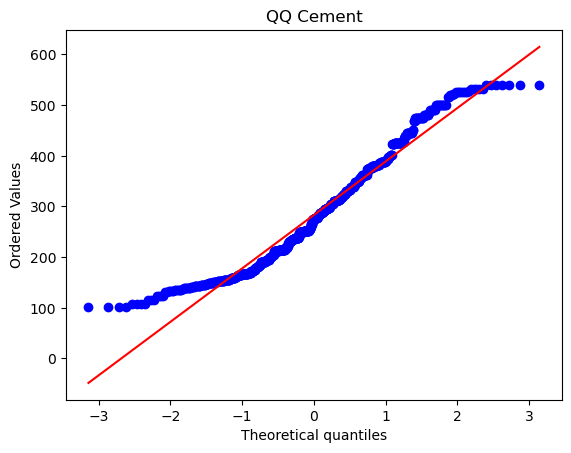

<Figure size 1400x400 with 0 Axes>

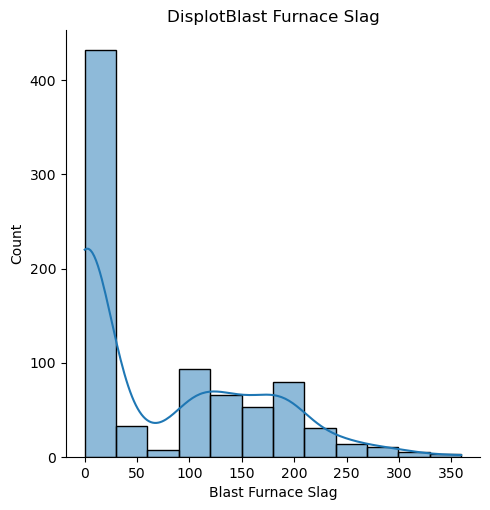

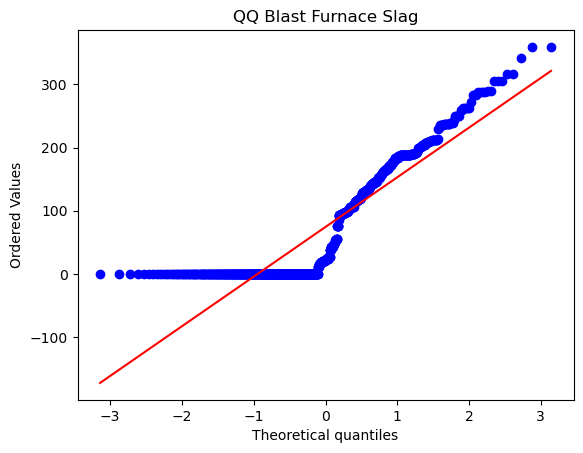

<Figure size 1400x400 with 0 Axes>

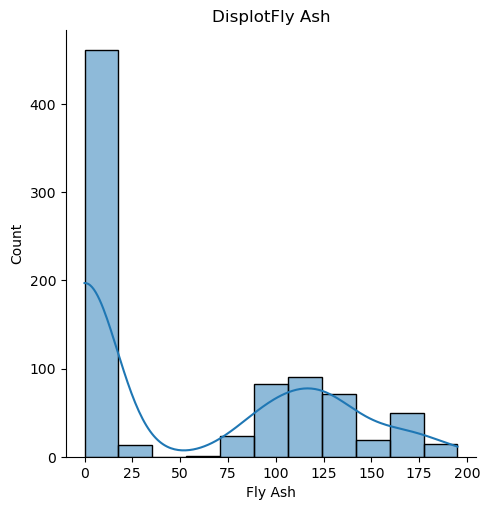

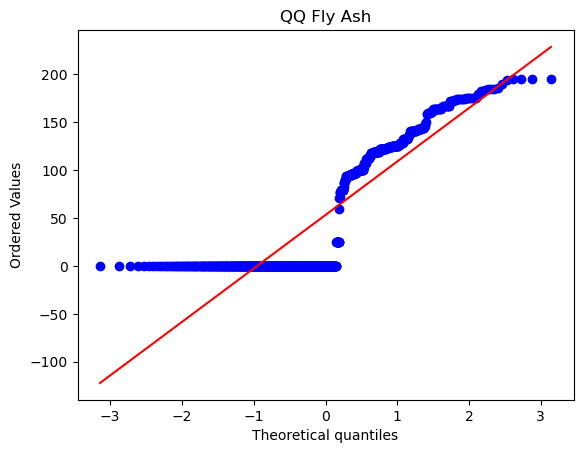

<Figure size 1400x400 with 0 Axes>

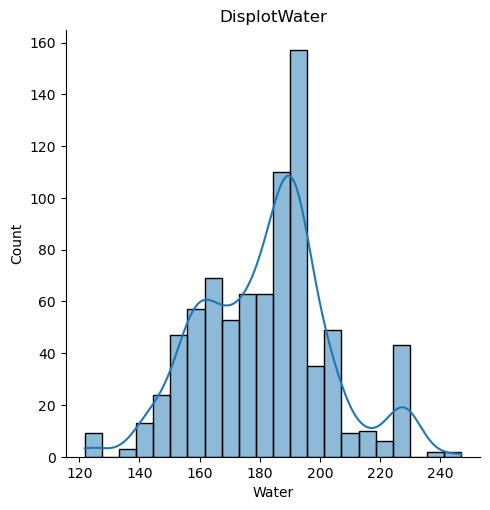

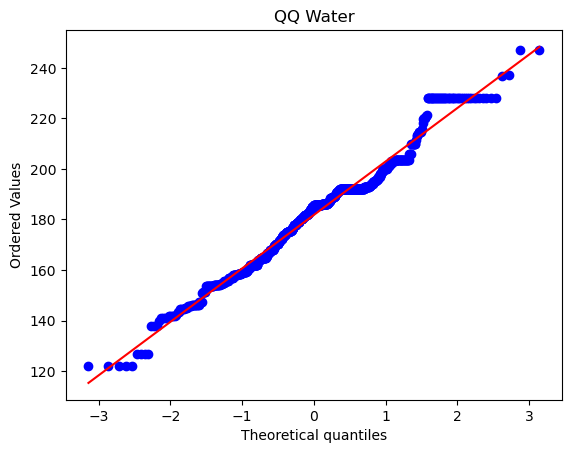

<Figure size 1400x400 with 0 Axes>

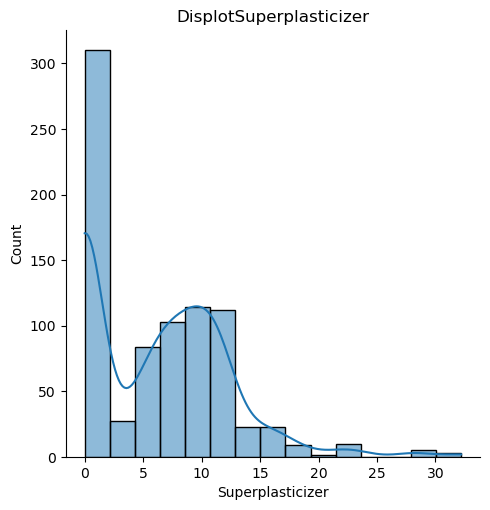

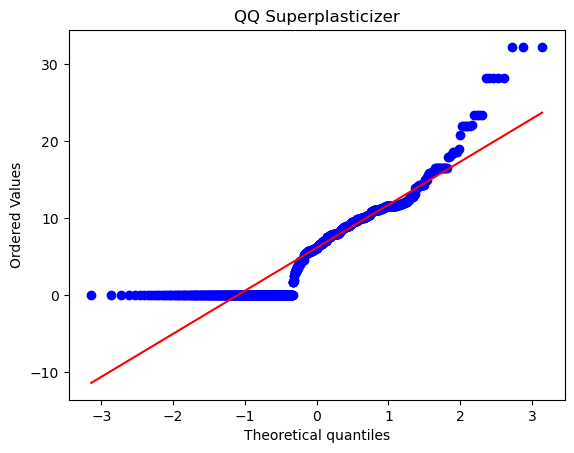

<Figure size 1400x400 with 0 Axes>

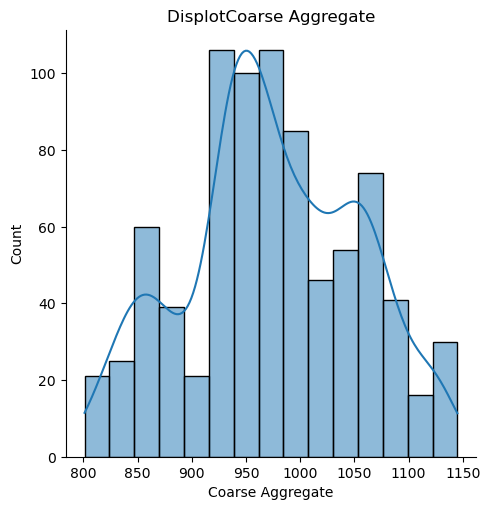

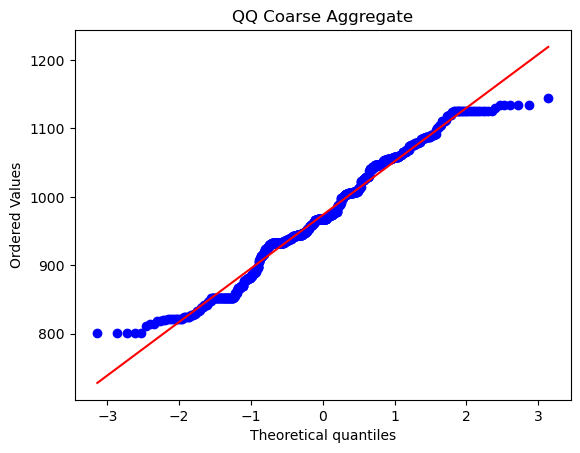

<Figure size 1400x400 with 0 Axes>

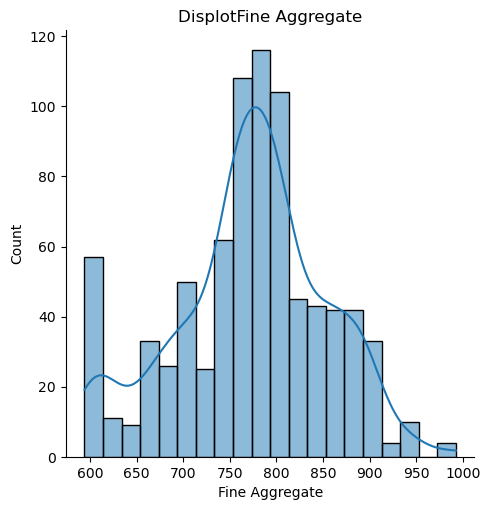

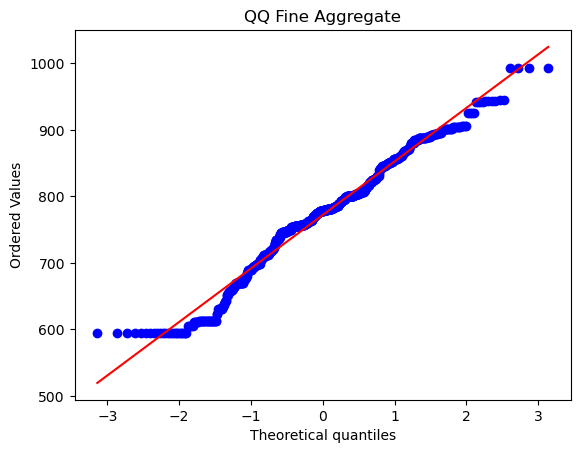

<Figure size 1400x400 with 0 Axes>

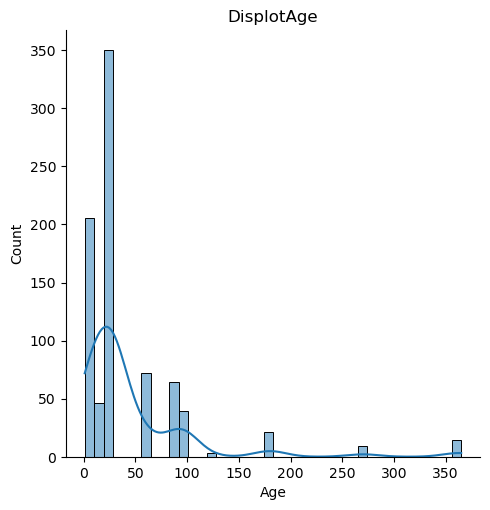

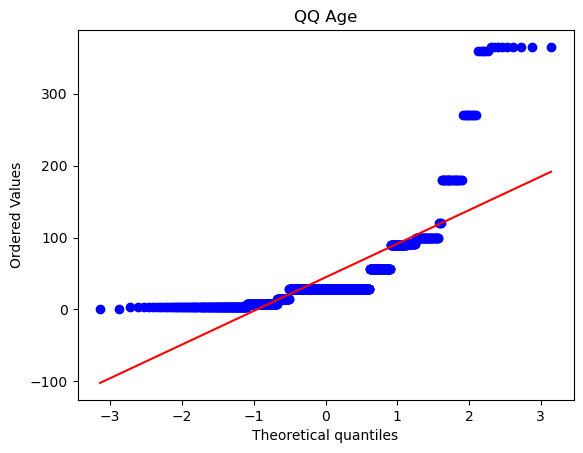

In [68]:
for i in X_train.columns:
    plt.figure(figsize=(14,4))
    sns.displot(X_train[i],kde=True)
    plt.title('Displot' +i)
    plt.show()
    
    stats.probplot(X_train[i],dist='norm',plot=plt)
    plt.title("QQ "+i)
    plt.show()


In [55]:
pt =PowerTransformer(method='box-cox')

X_train_trans =pt.fit_transform(X_train+0.0000001)
X_test_trans = pt.transform(X_test+0.0000001)


In [61]:
pd.DataFrame({'Col_name':X_train.columns,'box-cox':pt.lambdas_})

,Col_name,box-cox
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772681
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [66]:
lr =LinearRegression()

lr.fit(X_train_trans,y_train)

y_pred =lr.predict(X_test_trans)
print(r2_score(y_test,y_pred))



0.8042534499106897


In [67]:
X_trans = pt.transform(X+0.000001)
lr2 = LinearRegression()
(cross_val_score(lr2,X_trans,y,scoring='r2')).mean()


0.6673975732683857

In [73]:
pt.transform(X_train+0.000001)

array([[-1.27975147,  0.952465  ,  1.12792184, ..., -0.26250007,
        -0.67756846,  0.10600972],
       [ 1.24470596,  0.72494985,  1.13640769, ..., -1.9127279 ,
        -0.31406219,  0.10600972],
       [ 0.07984237, -0.90860405,  1.13091439, ...,  1.01840673,
         0.02595745, -1.67596979],
       ...,
       [-0.84451726, -0.90860405,  1.13293882, ...,  1.34536666,
         0.29715695,  1.24673336],
       [ 1.56562351,  0.92507694, -0.58710397, ..., -1.53725478,
         0.07621111,  0.10600972],
       [ 0.42655632, -0.90860405,  1.12619639, ..., -0.62083413,
         0.09510821,  0.10600972]])

In [76]:
X_train_trans2= pd.DataFrame(X_train_trans,columns=X_train.columns)

<Figure size 1400x400 with 0 Axes>

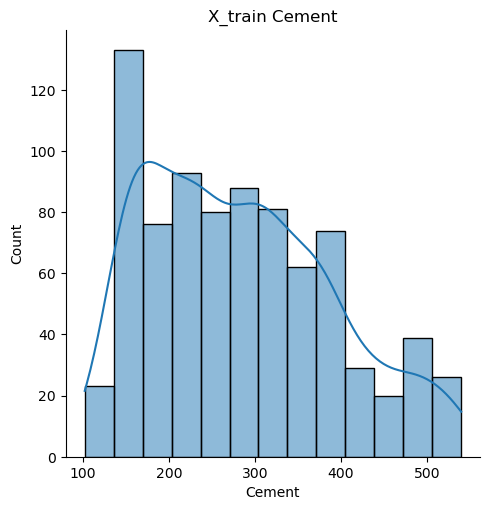

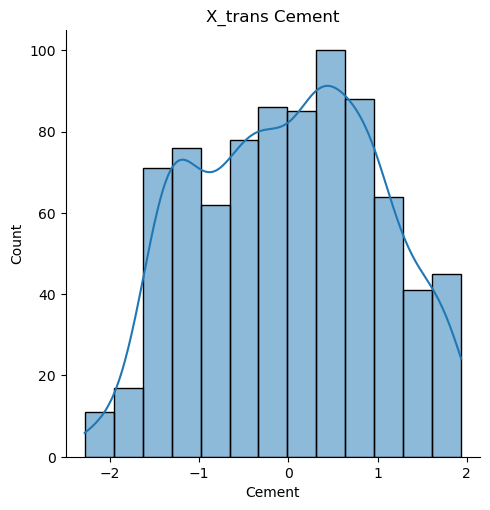

<Figure size 1400x400 with 0 Axes>

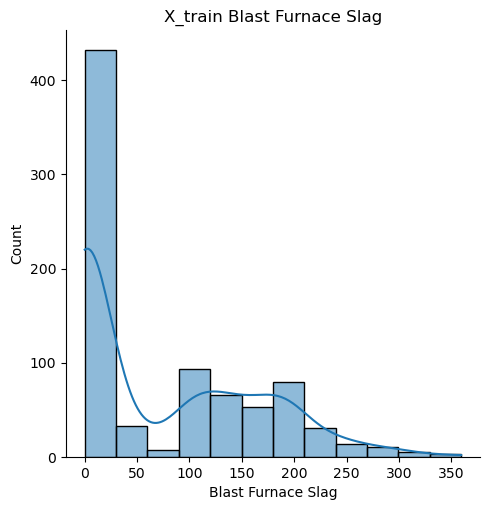

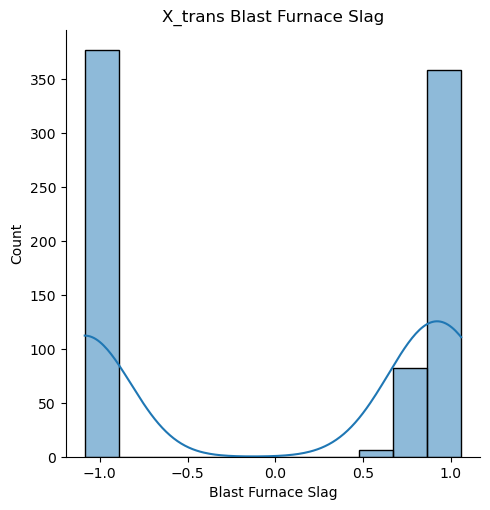

<Figure size 1400x400 with 0 Axes>

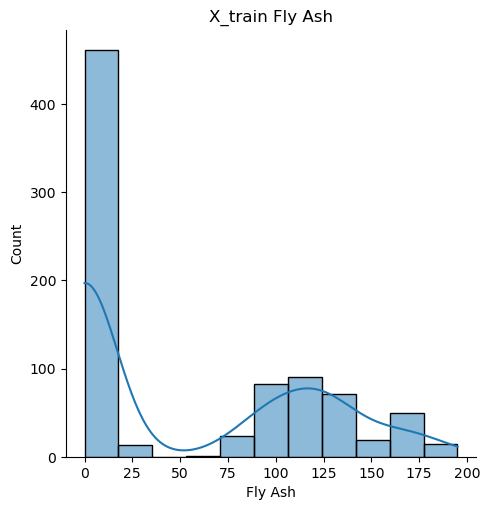

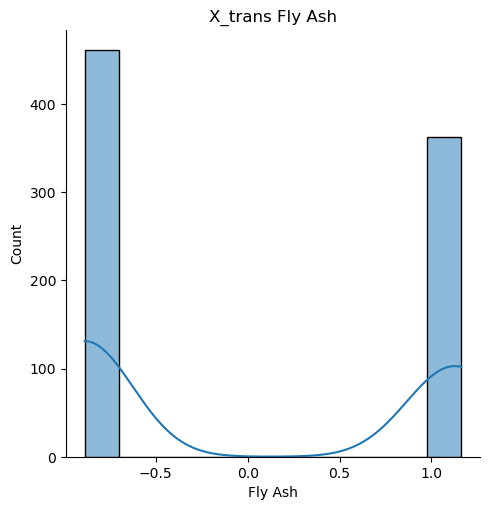

<Figure size 1400x400 with 0 Axes>

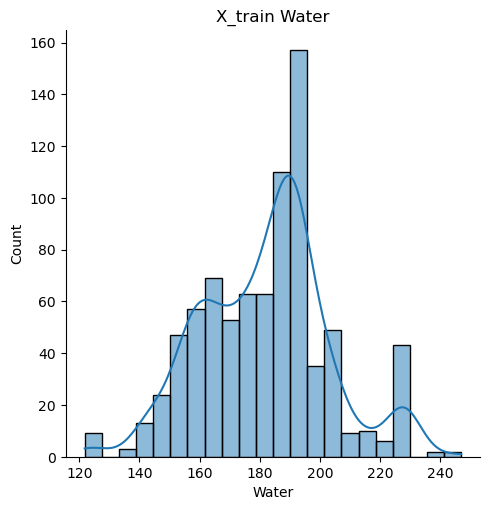

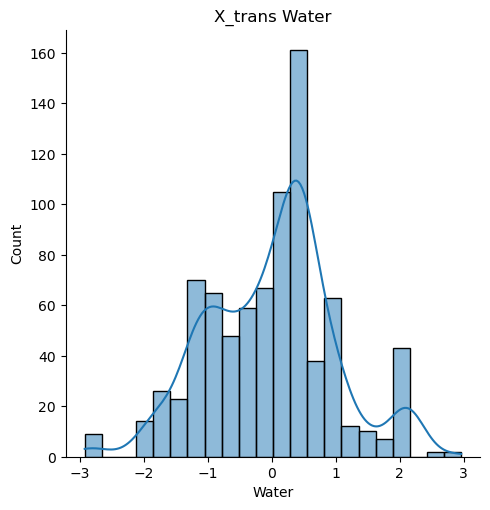

<Figure size 1400x400 with 0 Axes>

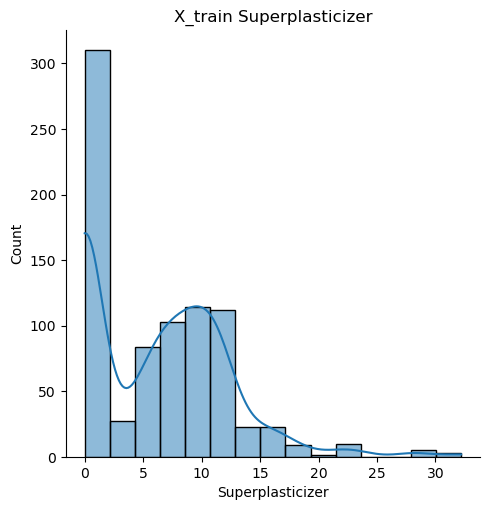

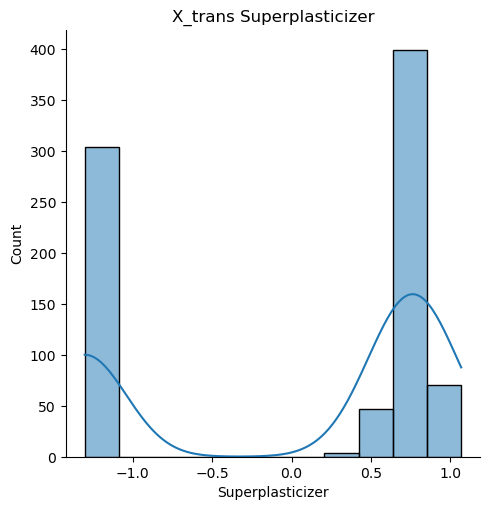

<Figure size 1400x400 with 0 Axes>

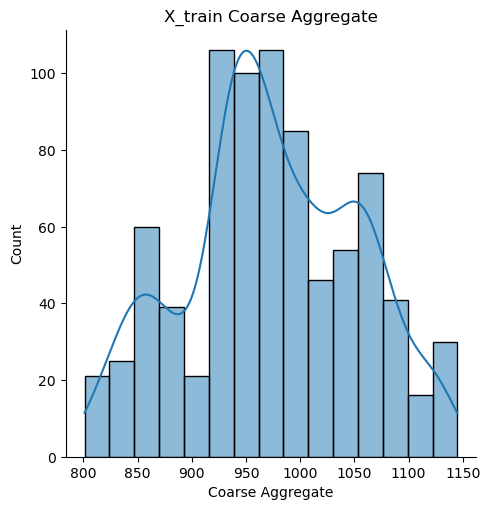

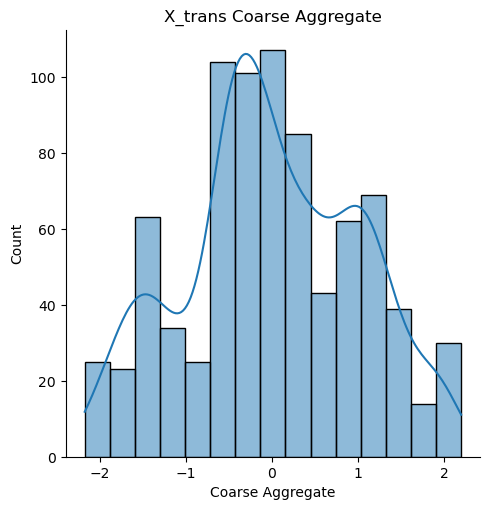

<Figure size 1400x400 with 0 Axes>

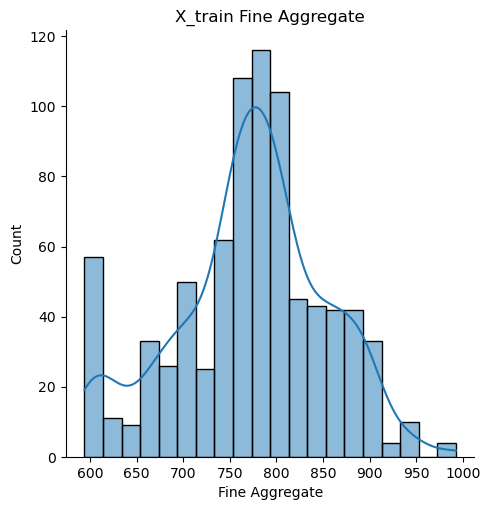

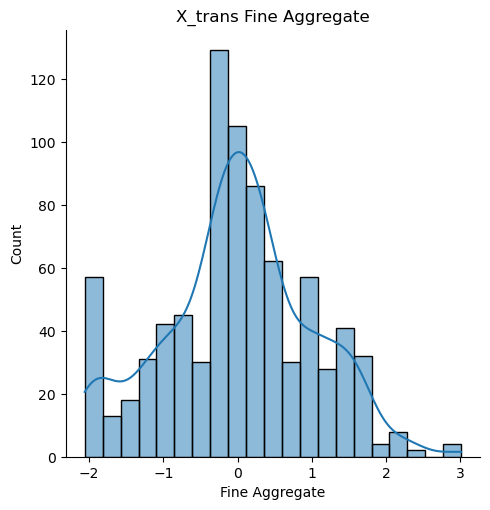

<Figure size 1400x400 with 0 Axes>

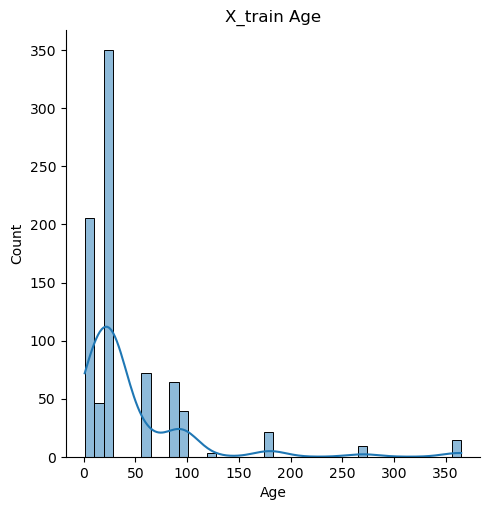

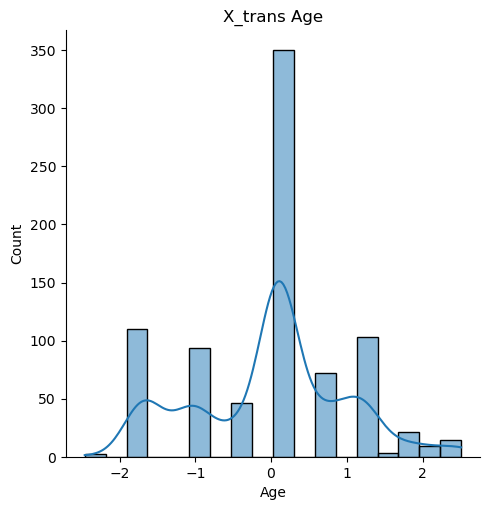

In [88]:
for i in X_train_trans2.columns:
    plt.figure(figsize=(14,4))
    sns.displot(X_train[i],kde=True)
    plt.title('X_train ' +i)
    sns.displot(X_train_trans2[i],kde=True)
    plt.title('X_trans ' +i)
    plt.show()

In [89]:
pt2 = PowerTransformer()
X_yj=pt2.fit_transform(X)

lr =LinearRegression()

cross_val_score(lr,X_yj,y,scoring='r2').mean()

0.6834625134285744

In [96]:
ptyj =PowerTransformer()



X_train_transyj =ptyj.fit_transform(X_train)
X_test_transyj = ptyj.transform(X_test)
pd.DataFrame({'Col_name':X_train.columns,
              'box-cox':pt.lambdas_,
              'y-j':ptyj.lambdas_,
              'Diff.':((pt.lambdas_)-(ptyj.lambdas_)),
              'Max':min(((pt.lambdas_)-(ptyj.lambdas_)))
             })

,Col_name,box-cox,y-j,Diff.,Max
0,Cement,0.177025,0.174348,0.002678,-0.166794
1,Blast Furnace Slag,0.022767,0.015715,0.007051,-0.166794
2,Fly Ash,-0.034635,-0.161447,0.126812,-0.166794
3,Water,0.772681,0.771307,0.001375,-0.166794
4,Superplasticizer,0.087141,0.253935,-0.166794,-0.166794
5,Coarse Aggregate,1.129813,1.130050,-0.000237,-0.166794
6,Fine Aggregate,1.782018,1.783100,-0.001082,-0.166794
7,Age,0.066631,0.019885,0.046746,-0.166794


In [94]:
max(((pt.lambdas_)-(ptyj.lambdas_)))

0.12681165093235158